In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
%matplotlib inline

matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
# Check Multicolinearlity
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=10):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            #print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

In [3]:
df = pd.read_csv('final_190509_edit.csv', encoding ='euc-kr')
#df2 = df.set_index('dong')
#df2.index

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 99 columns):
year                 3198 non-null int64
month                3198 non-null int64
dong                 3198 non-null object
upjong               3198 non-null object
living_ingu          3198 non-null float64
revenue              3198 non-null float64
jumin_ingu           3198 non-null int64
jugan_sangju_ingu    3198 non-null int64
yagan_sangju_ingu    3198 non-null int64
세종.집합.상가.임대가격지수      3198 non-null float64
세종.소규모.상가.임대가격지수     3198 non-null float64
세종.중대형.상가.임대가격지수     3198 non-null float64
소비자물가_총지수            3198 non-null float64
생활물가지수               3198 non-null float64
신선식품지수               3198 non-null float64
농산물및석유류제외지수          3198 non-null float64
식료품및에너지제외지수          3198 non-null float64
지가변동률                3198 non-null float64
무연보통휘발유              3198 non-null float64
실내등유                 3198 non-null float64
자동차용.경유              3198 non-null float64
취업

In [4]:
df['mon'].drop_duplicates()

0       금남면
11      도담동
22      부강면
33      소정면
43      아름동
53      연기면
62      연동면
69      연서면
80      장군면
91      전동면
101     전의면
112    조치원읍
123     종촌동
133     한솔동
143     고운동
174     보람동
347     새롬동
Name: dong, dtype: object

In [67]:
# preparing dataframe
var = '세종시'
#lin = df[df['dong'] == '%s' % var]
lin = df
lin.drop(columns=['year','month','dong','upjong'], inplace =True)
lin.dropna(inplace=True)

In [71]:
lin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1795 entries, 0 to 1794
Data columns (total 95 columns):
living_ingu          1795 non-null float64
revenue              1795 non-null float64
jumin_ingu           1795 non-null int64
jugan_sangju_ingu    1795 non-null int64
yagan_sangju_ingu    1795 non-null int64
세종.집합.상가.임대가격지수      1795 non-null float64
세종.소규모.상가.임대가격지수     1795 non-null float64
세종.중대형.상가.임대가격지수     1795 non-null float64
소비자물가_총지수            1795 non-null float64
생활물가지수               1795 non-null float64
신선식품지수               1795 non-null float64
농산물및석유류제외지수          1795 non-null float64
식료품및에너지제외지수          1795 non-null float64
지가변동률                1795 non-null float64
무연보통휘발유              1795 non-null float64
실내등유                 1795 non-null float64
자동차용.경유              1795 non-null float64
취업자수_계               1795 non-null int64
비임금근로자               1795 non-null int64
X.자영업자               1795 non-null int64
X.고용원이.있는.자영업자       1795 non-null int64
X.고용

In [68]:
#for correlation
lin.corr().to_csv('results/Corr_%s.csv' % var, encoding = 'euc-kr')
#lin.corr().to_csv('results/Corr_의료등.csv', encoding = 'euc-kr')
#lin.corr()

In [14]:
from sklearn.preprocessing import scale

#without vif
y =lin['revenue']
x =lin.drop(columns = ['revenue'])

living_ingu = scale(y)
x = x.apply(scale)

C:\Users\BJW\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\BJW\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\BJW\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\BJW\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\BJW\Anaconda3\lib\site-packages\sklea

In [73]:
# with scaled version

from sklearn.preprocessing import scale

y_rev =lin['revenue']
x_rev =lin.drop(columns = ['revenue'])

#y_rev =lin['living_ingu']
#x_rev =lin.drop(columns = ['living_ingu', 'revenue'])

y_rev = scale(y_rev)
x_rev = x_rev.apply(scale)
x_rev = calculate_vif_(x_rev,10)

#y_liv =lin['living_ingu']
#x_liv =lin.drop(columns = ['living_ingu', 'revenue'])

#y_liv = scale(y_liv)
#x_liv = x_liv.apply(scale)
#x_liv = calculate_vif_(x_liv,10)



C:\Users\BJW\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\BJW\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\BJW\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\BJW\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\BJW\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was con

C:\Users\BJW\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Remaining variables:
Index(['living_ingu', 'jugan_sangju_ingu', '신선식품지수', '지가변동률', 'X.임시근로자',
       'X.일용근로자', '실업률.남자', '실업률.여자', '보험료.지역', 'sum.m00..x', 'sum.m15..x',
       'sum.f00..x', 'sum.m00..y', 'sum.m10..y', 'sum.m20..y', 'sum.f00..y',
       'merc_cnt', 'death_count'],
      dtype='object')


In [16]:
from sklearn.preprocessing import scale

y =lin['revenue']
x =lin.drop(columns = ['revenue'])

#y = scale(y)


x = calculate_vif_(x,10)

C:\Users\BJW\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\BJW\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Remaining variables:
Index(['living_ingu', 'sum.m00..y', 'sum.f00..y', 'sum.f70..y', 'merc_cnt',
       'death_count'],
      dtype='object')


C:\Users\BJW\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1545: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [74]:
# for linear regression
from scipy.stats import zscore

#y =lin_mod['living_ingu']
#x =lin_mod.drop(columns = 'living_ingu')


#x.info()

import statsmodels.api as sm
reg=sm.OLS(y_rev, x_rev)
result=reg.fit()

result_summary = result.summary()
result_html = result_summary.tables[1].as_html()
result_df = pd.read_html(result_html, header = 0, index_col=0)[0]
#result_df['s_x'] = x.std()
#result_df['s_y'] = y.std()
#result_df['std_coeff'] = result_df['coef'] * x.std() / y.std()

result_df.to_csv('results/LR_%s.csv'% var , encoding='euc-kr')
#result_df.to_csv('results/LR_의료등.csv' , encoding='euc-kr')
print(result.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     20.38
Date:                Thu, 23 May 2019   Prob (F-statistic):           2.92e-60
Time:                        11:07:52   Log-Likelihood:                -2378.5
No. Observations:                1795   AIC:                             4793.
Df Residuals:                    1777   BIC:                             4892.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
living_ingu           0.2839      0.04

In [37]:
import statsmodels.api as sm

x_liv.info()
reg_2=sm.OLS(y_liv, x_liv)
result_2=reg_2.fit()

result_summary2 = result_2.summary()
result_html2 = result_summary2.tables[1].as_html()
result_df2 = pd.read_html(result_html2, header = 0, index_col=0)[0]
#result_df['s_x'] = x.std()
#result_df['s_y'] = y.std()
#result_df['std_coeff'] = result_df['coef'] * x.std() / y.std()

result_df2.to_csv('results/LR_생활인구_%s.csv'% var , encoding='euc-kr')
#result_df.to_csv('results/LR_의료등.csv' , encoding='euc-kr')
print(result.summary2())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 133 to 1794
Data columns (total 10 columns):
sum.m10..x    120 non-null float64
sum.m20..x    120 non-null float64
sum.f55..x    120 non-null float64
sum.m00..y    120 non-null float64
sum.m05..y    120 non-null float64
sum.m25..y    120 non-null float64
sum.m30..y    120 non-null float64
sum.f00..y    120 non-null float64
sum.f35..y    120 non-null float64
merc_cnt      120 non-null float64
dtypes: float64(10)
memory usage: 10.3 KB
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.640   
Dependent Variable: y                AIC:                225.5380
Date:               2019-05-23 10:12 BIC:                247.8379
No. Observations:   120              Log-Likelihood:     -104.77 
Df Model:           8                F-statistic:        27.71   
Df Residuals:       112              Prob (F-statistic): 2.75e-23
R-squared:          0.664            Scale:            

In [14]:
s_y = y.std()
s_x = x.std()
print(s_y)
print(s_x)

1188902.7035628874
revenue                 2.940690e+08
customer_count          1.617571e+03
payment_count           1.781105e+03
saengwhal_population    2.652086e+05
jumin_ingu              1.352982e+04
jugan_sangju_ingu       1.407379e+04
yagan_sangju_ingu       1.503104e+04
세종.집합.상가.임대가격지수         2.704397e+00
세종.소규모.상가.임대가격지수        1.828208e+00
세종.중대형.상가.임대가격지수        1.601478e+00
소비자물가_총지수               3.630964e-01
생활물가지수                  5.971318e-01
신선식품지수                  6.187743e+00
농산물및석유류제외지수             2.034121e-01
식료품및에너지제외지수             1.504471e-01
지가변동률                   1.407235e-01
무연보통휘발유                 2.956745e+01
실내등유                    1.519784e+01
자동차용.경유                 2.968231e+01
취업자수_계                  5.559823e+00
비임금근로자                  1.699361e+00
X.자영업자                  1.586254e+00
X.고용원이.있는.자영업자          4.942951e-01
X.고용원이.없는.자영업자          1.081909e+00
X.무급가족종사자               4.931664e-01
임금근로자                   3.906427e+00
X.상용근로자            

In [15]:
result_df['s_x'] = s_x
result_df['s_y'] = s_y

In [17]:
result_df['std_coeff'] = result_df['coef'] * s_x / s_y

In [18]:
result_df

,coef,std err,t,P>|t|,[0.025,0.975],s_x,s_y,std_coeff
revenue,0.0003,0.000,2.327,0.023,0.000047,0.001,2.940690e+08,1.188903e+06,0.074203
customer_count,551.9665,97.948,5.635,0.000,356.886000,747.047,1.617571e+03,1.188903e+06,0.750982
payment_count,-268.2184,66.768,-4.017,0.000,-401.199000,-135.238,1.781105e+03,1.188903e+06,-0.401820
saengwhal_population,0.1694,0.171,0.991,0.325,-0.171000,0.510,2.652086e+05,1.188903e+06,0.037788
jumin_ingu,32.4703,11.757,2.762,0.007,9.055000,55.886,1.352982e+04,1.188903e+06,0.369515
jugan_sangju_ingu,-47.5552,21.985,-2.163,0.034,-91.341000,-3.769,1.407379e+04,1.188903e+06,-0.562941
yagan_sangju_ingu,23.3224,21.682,1.076,0.285,-19.862000,66.506,1.503104e+04,1.188903e+06,0.294860
세종.집합.상가.임대가격지수,3764.6077,7810.519,0.482,0.631,-11800.000000,19300.000,2.704397e+00,1.188903e+06,0.008563
세종.소규모.상가.임대가격지수,-4956.6216,7203.735,-0.688,0.494,-19300.000000,9390.859,1.828208e+00,1.188903e+06,-0.007622
세종.중대형.상가.임대가격지수,-1035.2552,4941.853,-0.209,0.835,-10900.000000,8807.297,1.601478e+00,1.188903e+06,-0.001395


In [83]:
import statsmodels.api as sm
reg=sm.OLS(y, x)
result=reg.fit()

In [84]:
result_summary = result.summary()
result_html = result_summary.tables[1].as_html()
result_df = pd.read_html(result_html, header = 0, index_col=0)[0]
result_df.to_csv('results/LR_새롬동.csv', encoding='euc-kr')
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     76.33
Date:                Mon, 13 May 2019   Prob (F-statistic):           4.53e-10
Time:                        02:06:47   Log-Likelihood:                -450.62
No. Observations:                  22   AIC:                             917.2
Df Residuals:                      14   BIC:                             926.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
living_ingu            -68.8870 

In [42]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     604.7
Date:                Mon, 13 May 2019   Prob (F-statistic):          3.21e-103
Time:                        00:43:25   Log-Likelihood:                -2542.0
No. Observations:                 132   AIC:                             5120.
Df Residuals:                     114   BIC:                             5172.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
living_ingu           -143.3392 

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [3]:
df_corr = df.drop(columns=['year','month','dong','upjong'])

In [7]:
result= df_corr.corr().to_csv('correlation_result.csv', encoding = 'euc-kr')

In [49]:
df_corr2 = df_corr.loc[:,'living_ingu':'생활물가지수']
df_corr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 13 columns):
living_ingu             3198 non-null float64
revenue                 3198 non-null float64
customer_count          3198 non-null float64
payment_count           3198 non-null float64
saengwhal_population    3198 non-null float64
jumin_ingu              3198 non-null int64
jugan_sangju_ingu       3198 non-null int64
yagan_sangju_ingu       3198 non-null int64
세종.집합.상가.임대가격지수         3198 non-null float64
세종.소규모.상가.임대가격지수        3198 non-null float64
세종.중대형.상가.임대가격지수        3198 non-null float64
소비자물가_총지수               3198 non-null float64
생활물가지수                  3198 non-null float64
dtypes: float64(10), int64(3)
memory usage: 324.9 KB


In [ ]:
df_corr['']

/home/admin1/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


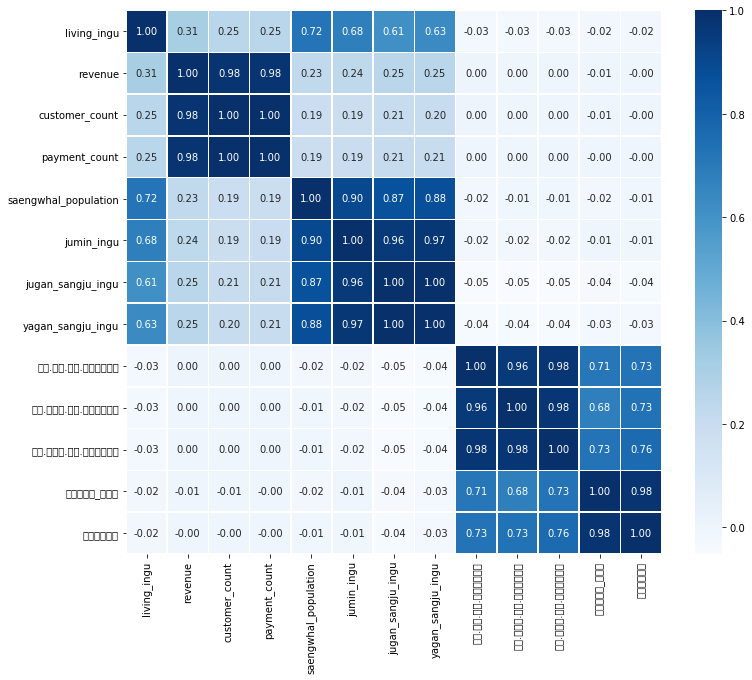

In [60]:
import seaborn as sns
corr = df_corr2.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap = 'Blues',
            linewidths=.5, annot=True,fmt='.2f')

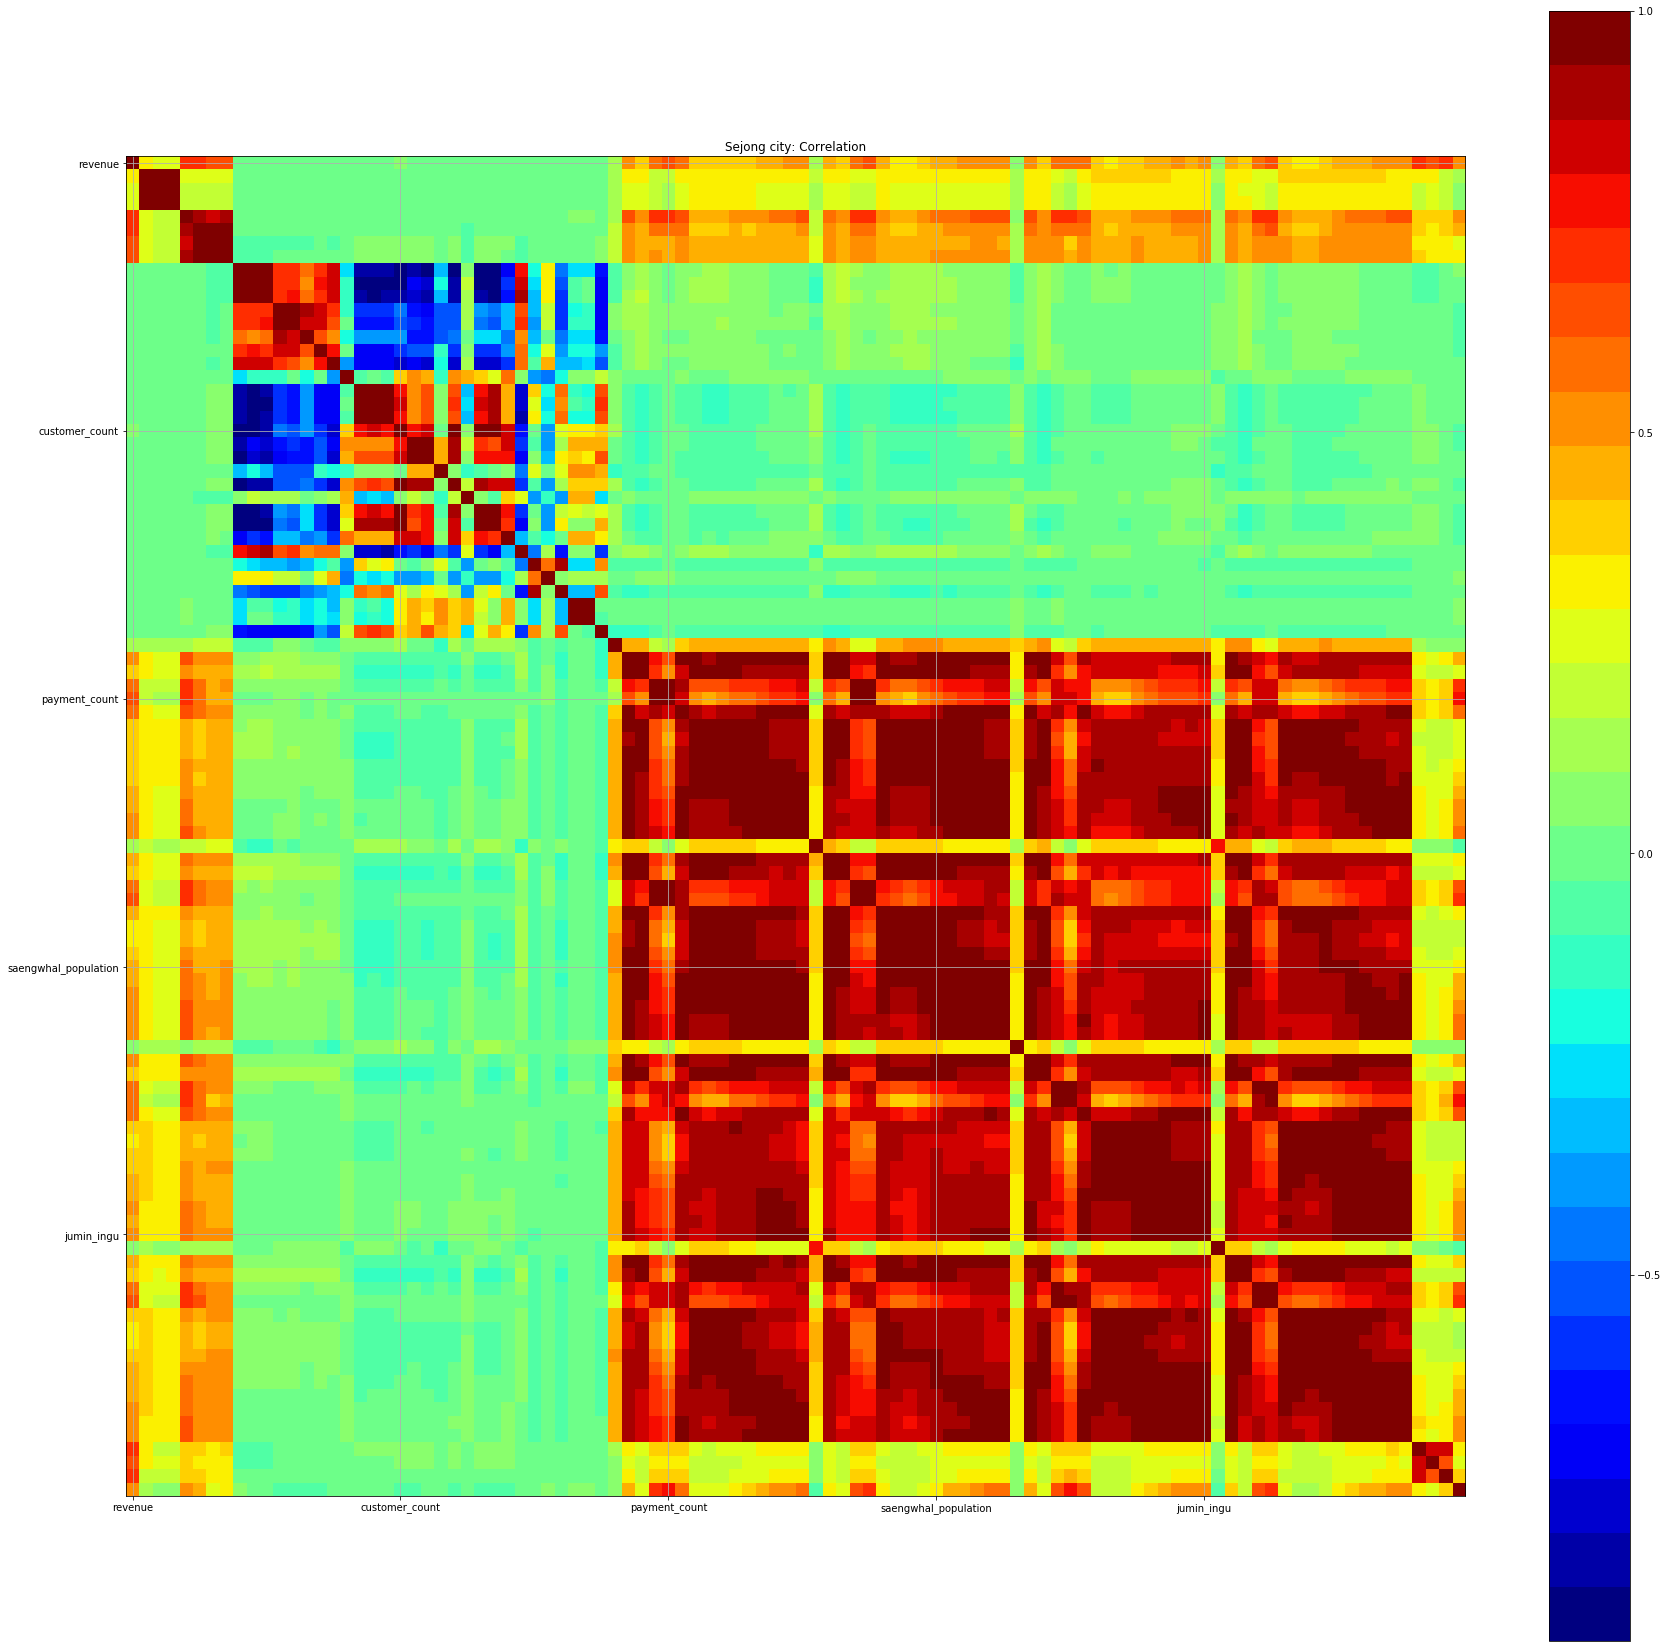

In [33]:
def correlation_matrix(df):    
    fig = plt.figure(figsize=(30,30))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Sejong city: Correlation')
    #labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    ax1.set_xticklabels(df.columns,fontsize=10)
    ax1.set_yticklabels(df.columns,fontsize=10)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-1,-0.5,0,0.5,1])
    plt.show()
    
correlation_matrix(df_corr)

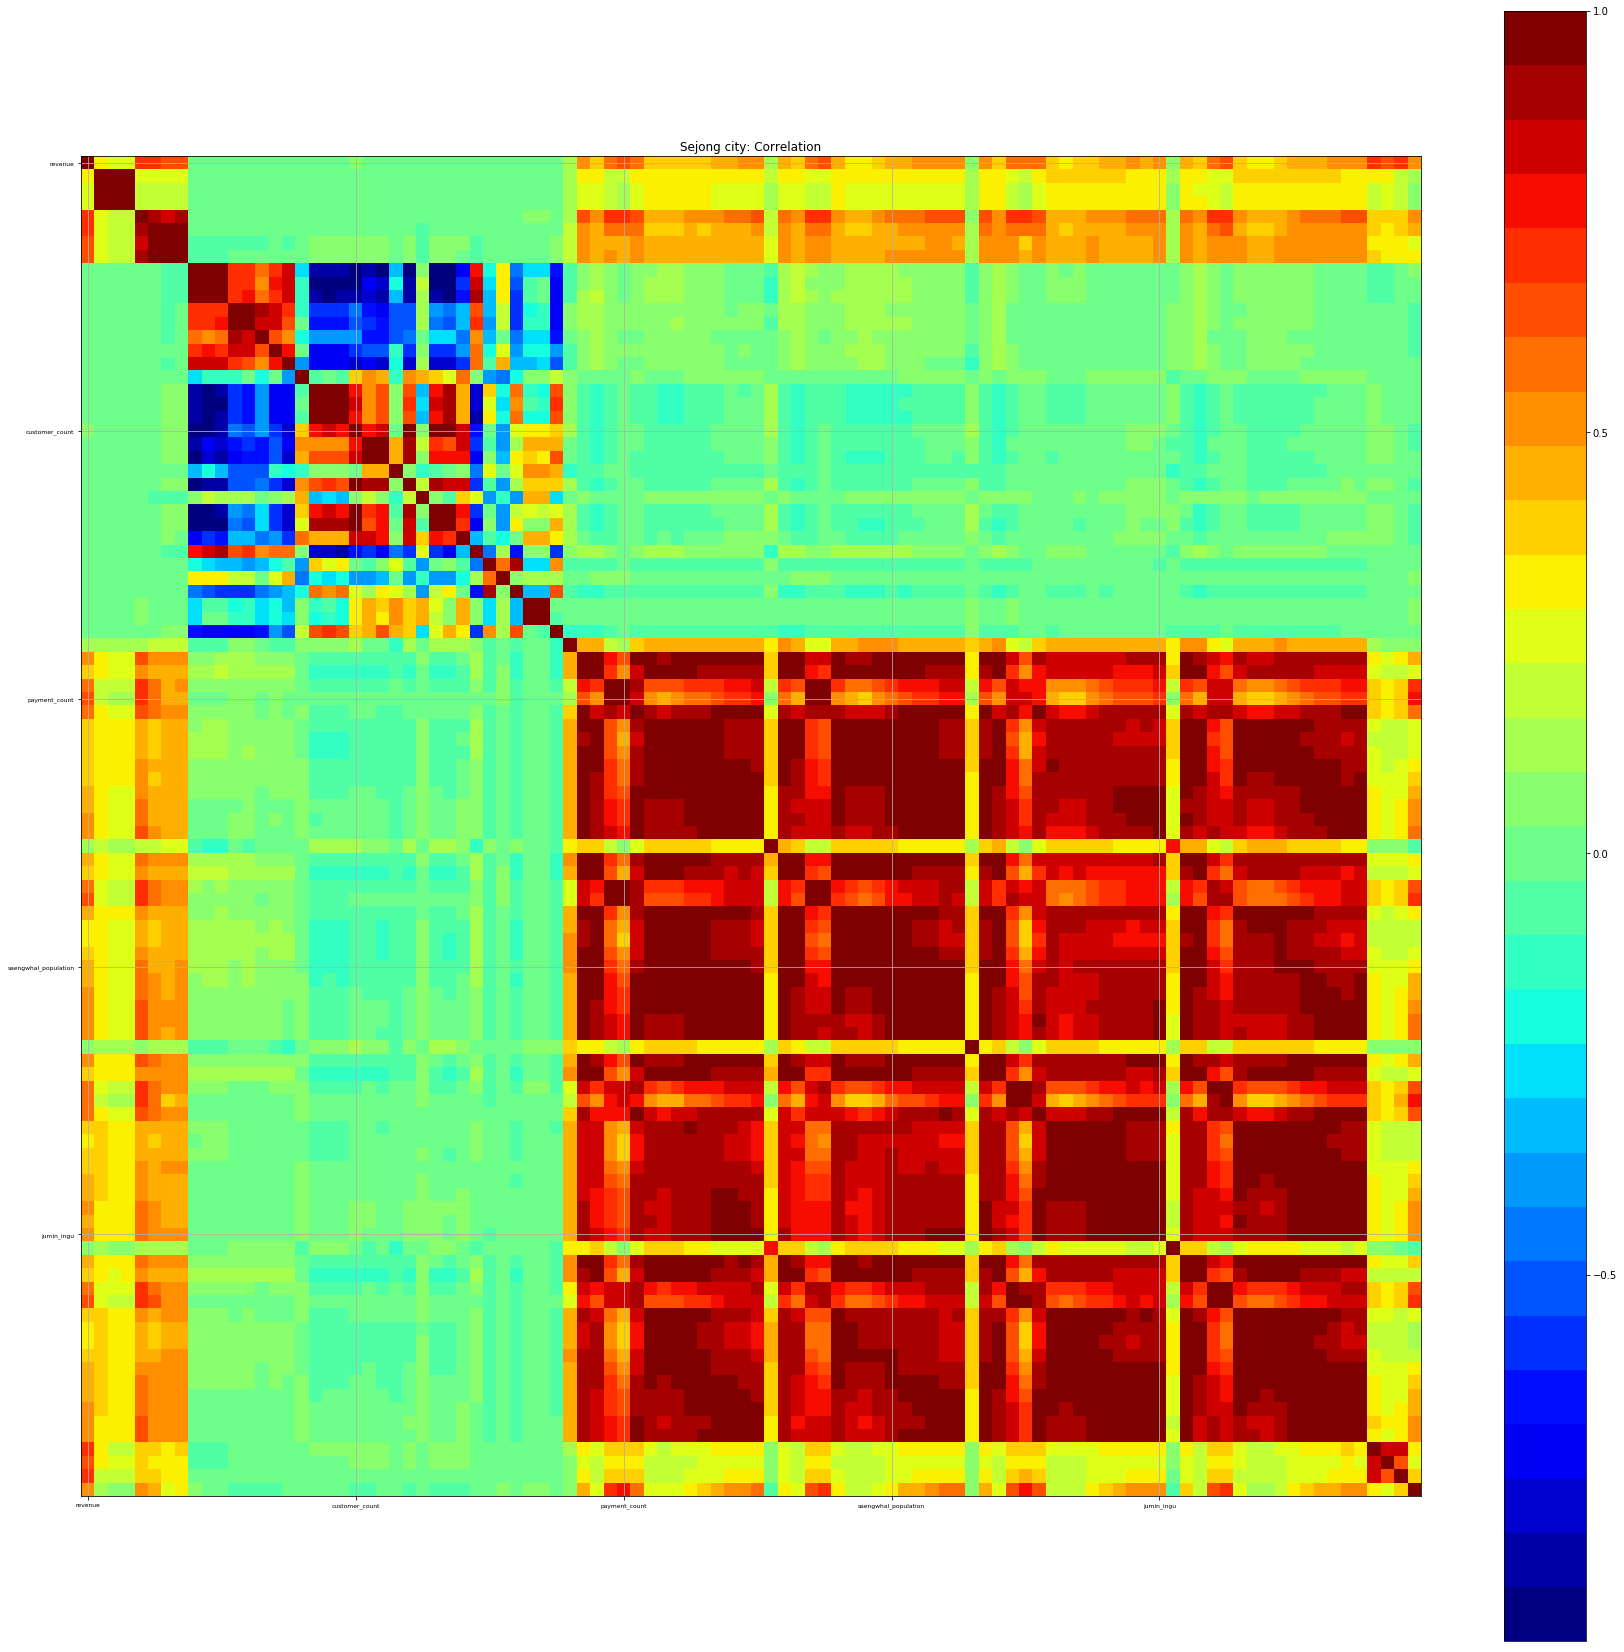

In [31]:
correlation_matrix(df_corr)